# Tutorial 2 - Planetary Module

This tutorial demonstrates the use of the **Planetary.Objects** module to load in all available data of any given Solar System object.

## 2.1 Planetary Objects
The **Planetary.Objects** module contains three classes **Planet**, **Moon**, and **Asteroid**.
The core function of these classes is to act as data containers to provide access to all available data for a particular Solar System Object. Each class is parsed a name, number, or designation of the object of interest. Data for this object is then queried from the PostgreSQL database (generated from the **Datasets** and **Database** modules), and appended as class attributes. Where possible, attributes are formatted as [Astropy Quantities](https://docs.astropy.org/en/stable/units/), storing the values together with their physical units.

Additional data models are generated for representing sub-components specific to the planetary class.

### Planets
**Planet** objects are instantiated by parsing the name of one of the 8 Solar System planets (Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune). Pluto can be created as an **Asteroid** object, described below.

Planet object contain basic bulk and orbital parameters obtained from the [NASA Planetary Fact Sheets](https://nssdc.gsfc.nasa.gov/planetary/planetfact.html). Additional photometric and spectral data are obtained from literature [(Mallama, Krobusek & Pavlov, 2016)](https://arxiv.org/ftp/arxiv/papers/1609/1609.05048.pdf).

Here, we can load in data objects for Earth, Mars, and Jupiter, then inspect some of its basic attributes.

In [92]:
# Import the module
from sr_tools.Planetary.Objects import Planet, Moon, Asteroid

# Retrieve data for the planets
earth = Planet('Earth')
mars = Planet('Mars')
jupiter = Planet('Jupiter')

# Print some basic attributes for Earth
print(earth.symbol + ' ' + earth.name) # Symbol + Name
print('Parent: {}'.format(str(earth.parent.name)))
# Physical attributes
print('Radius: {}'.format(str(earth.radius)))
print('Density: {}'.format(str(earth.density)))
# Orbital attributes
print('a: {}'.format(str(earth.a)))
print('e: {}'.format(str(earth.e)))
print('i: {}'.format(str(earth.i)))



<class 'sr_tools.datasets.PlanetaryFactsheets'><bound method PlanetaryFactsheets.import_elements_moons_from_csv of <class 'sr_tools.datasets.PlanetaryFactsheets'>>


C:\Users\scott\Documents\Repos\SR_TOOLS_PROJECT\sr_tools\src\sr_tools\datasets.py:952: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\scott\Documents\Repos\SR_TOOLS_PROJECT\sr_tools\src\sr_tools\datasets.py:953: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



⨁ Earth
Parent: Sol
Radius: 6371.0
Density: 5514.0
a: 1.000563974163579 AU
e: 0.01136496347411769
i: 0.009790260212967535 deg


### Moons
**Moon**s are similarly instantiated by their name, or a designation - a string containing the first letter of the parent planet and a Roman numeral specifying the moon. For example, the four Galilean moons of Jupiter are designated (JI) Io, (JII) Europa, (JIII) Ganymede, and (JIV) Callisto. While the Earth's moon does not have an official name, we refer to it here by it's unofficial name 'Luna'. 

**Moon** objects have similar basic properties to **Planet**s, however there are some differences. **Moon**s do not have an astronomical symbol, and their orbital properties are defined respect to the parent planet, rather than Heliocentric.

Here we will load the Earth's moon, Luna and print some basic attributes.

In [72]:
luna = Moon('Luna')

# Print attributes of Luna
print(luna.name) # Name
print('Parent: {}'.format(str(luna.parent)))
print('Radius: {}'.format(str(luna.radius)))
print('Density: {}'.format(str(luna.density)))

# Orbital attributes
print('a: {}'.format(str(luna.a)))
print('e: {}'.format(str(luna.e)))
print('i: {}'.format(str(earth.i)))

Luna
Parent: Earth
Radius: 1737.4
Density: 3344.0
a: 0.002555351548986928 AU
e: 0.05021986801204281
i: 0.009790260212967535 deg


### Asteroids
**Asteroid** objects are created through either the asteroid's name or number (primary designation), or provisional designation. As the main focus of the SR-Tools package has been on asteroids, there are a lot more attributes available for asteroids.

In [91]:
# Load in some asteroids
bennu = Asteroid('Bennu')   # By name
apophis = Asteroid('99942') # By number
ast2014ek24 = Asteroid('2014 EK24') # By provisional designation

#### Dash App
The **Asteroid** class provides an additional method for display data and visualizations of the asteroid in a web-based [Dash](https://plotly.com/dash/) application.

In [74]:
# Launch a Dash app displaying bennu's properties
# bennu.run_app()
# (This will be launched in a separate web browser)

## 2.2. Planetary Orbits

The planetary object classes can be extended by appending additional object classes, modelling subcomponents of the planetary bodies including Orbit, spectrum, and a bulk physical body. Each of these classes are defined in sub-modules of the Planetary module. Even finer details can be added as sub-classes of these models, generating an aggregation system-of-systems model for the entire planetary body.

The first sub-component is an **Orbit** class representing the orbital motion and ephemeris of the planetary object. At present, the orbit model uses the [Poliastro](https://docs.poliastro.space/en/stable/api/safe/twobody/twobody_index.html) package to create a two-body model from the object's Keplerian elements. This **Orbit** class contains methods to propagate the orbit, generate ephemerides, and basic orbit plotting. Work is currently underway to generate a more detailed **Ephemeris** class to provide more detailed orbit propagation methods including from JPL Horizons and from SPICE files. This will also include more advanced and interactive plotting methods.

**Orbit** objects are appended by default in the **__init__** method of all **Planet**, **Moon**, and **Asteroid** objects, so we can inspect the orbits of the existing objects we have created above.

In [75]:
# Print the orbit object of asteroid Apophis
apophis.Orbit

1 x 1 AU x 3.4 deg (HCRS) orbit around Sun (☉) at epoch 2021-05-13 00:00:00.000 (TDB)

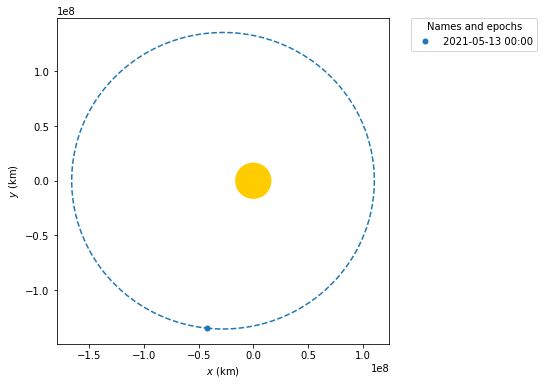

In [76]:
# Plot the orbit of Apophis
# (include interactive plotting with Plotly)
apophis.Orbit.plot(interactive=False)

## 2.3 Planetary Body
The **Planetary.Bodies** module provides classes for modelleing the bulk physical structure of planetary objects. The **ConstDensityBody** class provides the basic model of a convex polyhedral body with constant density throughout its interior.

A **ConstDensityBody** can be generated from either a shapefile (.obj) or the dimensions of a tri-axial ellipsoid. Class method exist for generating triangulated surface meshes or tetrahedral volume meshes of the body, from which mass, volume, intertia tensor, and spherical harmonic gravity coefficients are computed. Additional methods allow for 3D rendering of the body using VTK-based python packages (both [PyVista](https://docs.pyvista.org/) and [vedo](https://github.com/marcomusy/vedo)).

In [85]:
# Import the ConstDensityBody class
from sr_tools.Planetary.Bodies import ConstDensityBody
from sr_tools.datasets import Datasets
import numpy as np

# Create a Material object with CI meteorite properties
from sr_tools.Planetary.Materials import Material
CI_material = Material.from_meteorite(type='CI') # CI meteorite properties

# Select a directory and name of shapefile
SHAPE_DIR = Datasets.get_data_home()/'Shapefiles'/'Asteroid'
file = 'Bennu_EAR-A-I0037-5-BENNUSHAPE-V1.0.obj'

# Generate a ConstDensityBody from a shapefile of asteroid Bennu
bennu.SetBody(ConstDensityBody.from_shapefile('Bennu_EAR-A-I0037-5-BENNUSHAPE-V1.0.obj',SHAPE_DIR,
                                     AngVel=np.array([0.,0.,0.5]),
                                     material=CI_material))

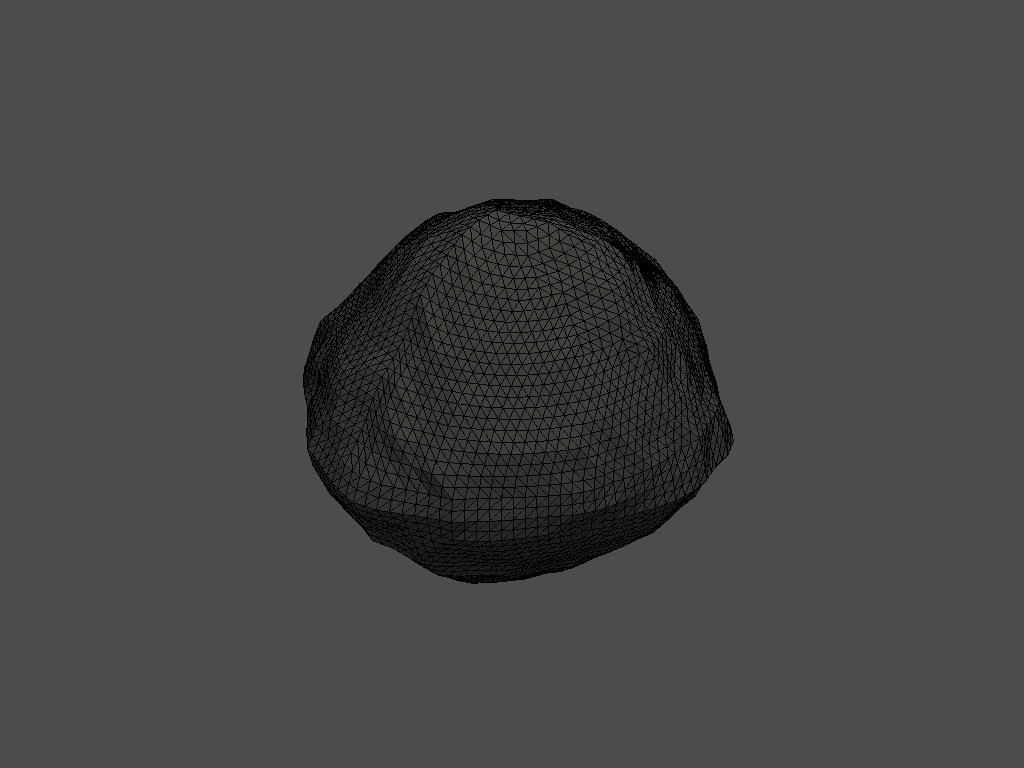

In [90]:
# Render the body using PyVista
bennu.Body.plot_pv(notebook=True)